<a href="https://colab.research.google.com/github/shaikh-uvesh/India-COVID19-Analytics-ML/blob/main/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt

# 2. Load the datasets
# Make sure filenames match exactly what you uploaded
cases_df = pd.read_csv('covid_19_india.csv')
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')
testing_df = pd.read_csv('StatewiseTestingDetails.csv')

# 3. Quick look at the data
print("Cases Data Head:")
print(cases_df.head())
print("\nVaccine Data Head:")
print(vaccine_df.head())

Cases Data Head:
   Sno        Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  2020-01-30  6:00 PM               Kerala                       1   
1    2  2020-01-31  6:00 PM               Kerala                       1   
2    3  2020-02-01  6:00 PM               Kerala                       2   
3    4  2020-02-02  6:00 PM               Kerala                       3   
4    5  2020-02-03  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3  

Vaccine Data Head:
   Updated On  State  Total Doses Administered  Sessions   Sites   \
0  16/01/2021  India                   48276.0    3455.0   2957.0   
1  17/01/2021  India                  

In [ ]:
# 1. Convert Date columns to standard datetime format
cases_df['Date'] = pd.to_datetime(cases_df['Date'], format='%Y-%m-%d', errors='coerce')
vaccine_df['Updated On'] = pd.to_datetime(vaccine_df['Updated On'], format='%d/%m/%Y', errors='coerce')

# 2. Drop columns that aren't useful for analysis (e.g., Time, Sno)
cases_df.drop(['Sno', 'Time', 'ConfirmedIndianNational', 'ConfirmedForeignNational'], axis=1, inplace=True, errors='ignore')

# 3. Calculate 'Active' cases (Confirmed - Cured - Deaths)
cases_df['Active'] = cases_df['Confirmed'] - cases_df['Cured'] - cases_df['Deaths']

# 4. Check for missing values
print("Missing values in Cases Data:")
print(cases_df.isnull().sum())

print("\nData Cleaning Complete.")

Missing values in Cases Data:
Date                    0
State/UnionTerritory    0
Cured                   0
Deaths                  0
Confirmed               0
Active                  0
dtype: int64

Data Cleaning Complete.


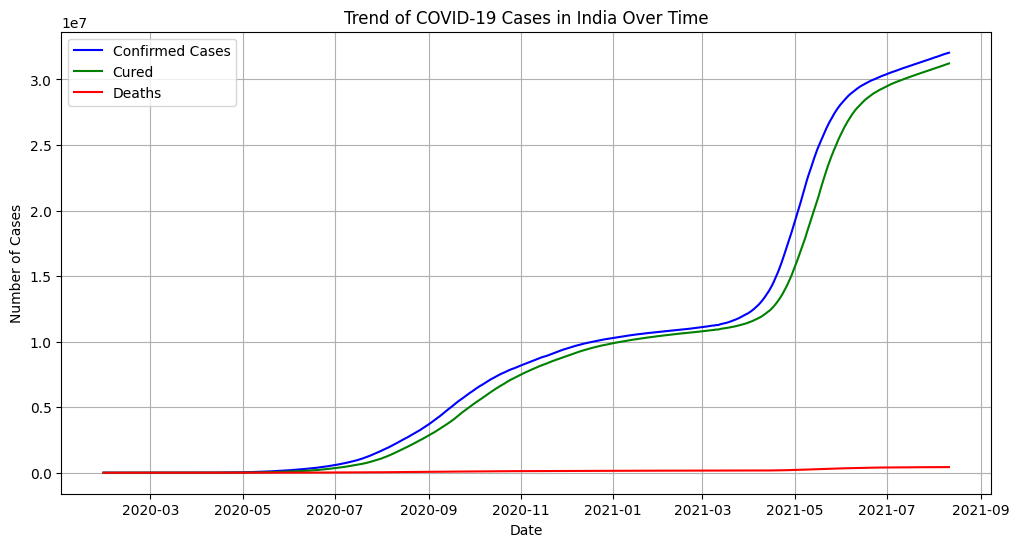

In [ ]:
# Group by Date to get total cases for all of India
india_trend = cases_df.groupby('Date').sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=india_trend, x='Date', y='Confirmed', label='Confirmed Cases', color='blue')
sns.lineplot(data=india_trend, x='Date', y='Cured', label='Cured', color='green')
sns.lineplot(data=india_trend, x='Date', y='Deaths', label='Deaths', color='red')

plt.title('Trend of COVID-19 Cases in India Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-715694296.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='State/UnionTerritory', y='Confirmed', palette='Reds_r')


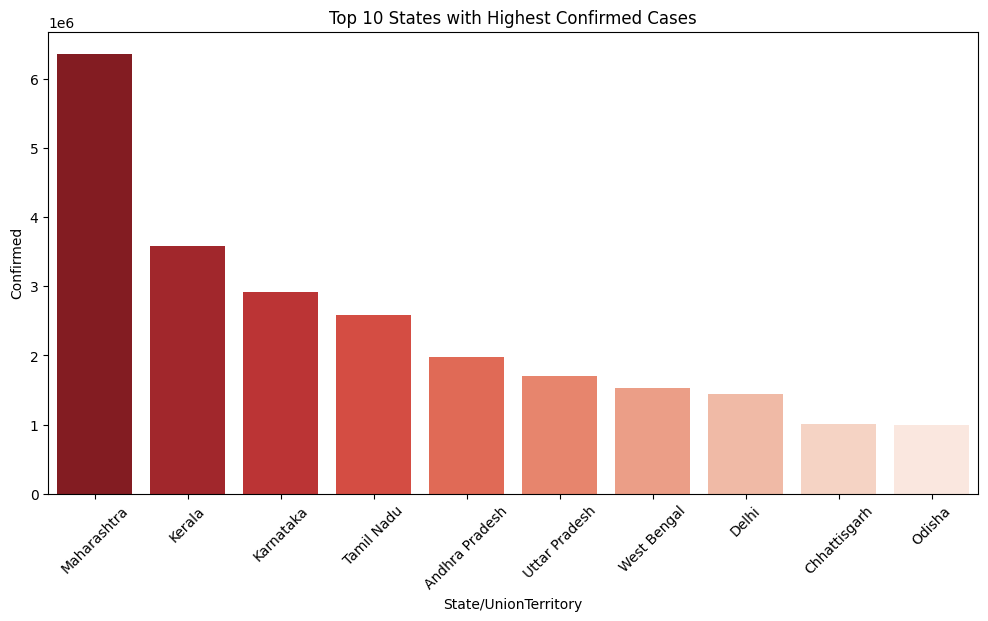

In [ ]:
# Get the latest date in the dataset
latest_date = cases_df['Date'].max()
state_latest = cases_df[cases_df['Date'] == latest_date]

# Sort by Confirmed cases
top_10_states = state_latest.sort_values(by='Confirmed', ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_states, x='State/UnionTerritory', y='Confirmed', palette='Reds_r')
plt.title('Top 10 States with Highest Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

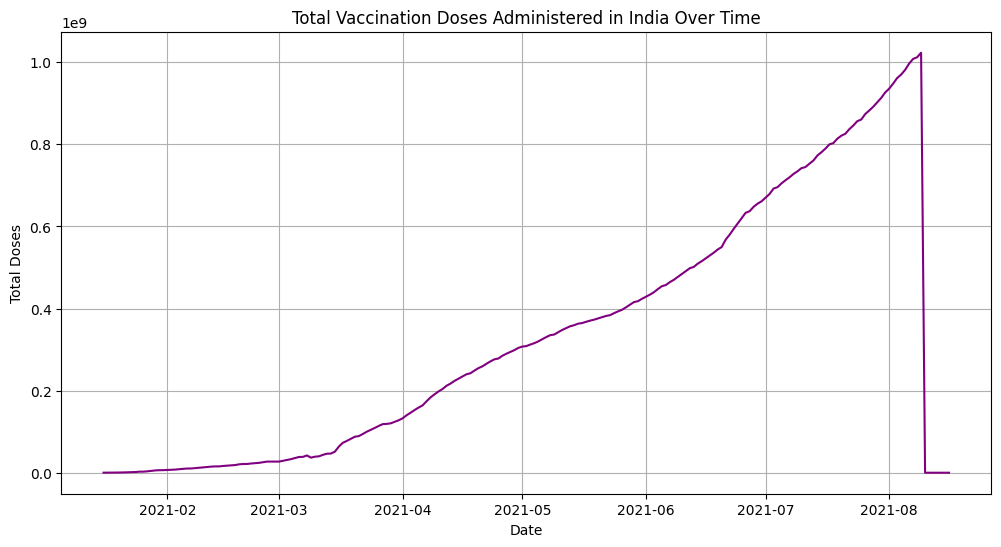

In [ ]:
# Rename 'Updated On' to 'Date' for consistency
vaccine_df.rename(columns={'Updated On': 'Date'}, inplace=True)

# Group by Date to see total vaccinations in India
vaccine_trend = vaccine_df.groupby('Date')['Total Doses Administered'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vaccine_trend, x='Date', y='Total Doses Administered', color='purple')
plt.title('Total Vaccination Doses Administered in India Over Time')
plt.xlabel('Date')
plt.ylabel('Total Doses')
plt.grid(True)
plt.show()

Model R-Squared Score: 0.87


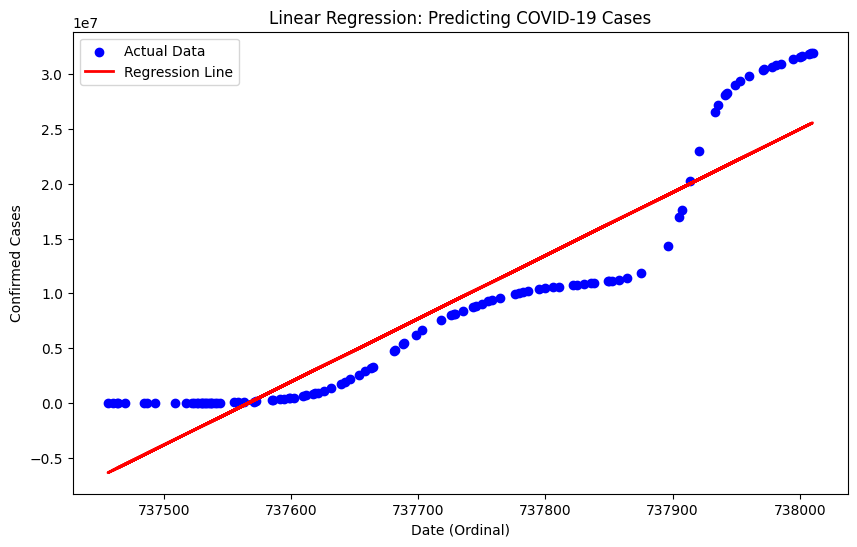

In [ ]:
# 1. Prepare Data for Modeling
# We convert dates to ordinal numbers (dates as integers) for regression
model_data = india_trend[['Date', 'Confirmed']].copy()
model_data['Date_Ordinal'] = model_data['Date'].map(dt.datetime.toordinal)

# 2. Split Data (Training and Testing)
X = model_data[['Date_Ordinal']]
y = model_data['Confirmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = model.predict(X_test)

# 5. Evaluate the Model
score = model.score(X_test, y_test)
print(f"Model R-Squared Score: {score:.2f}")

# 6. Plotting Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Predicting COVID-19 Cases')
plt.xlabel('Date (Ordinal)')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.show()

Future Predictions for next 5 days:
        Date  Predicted_Cases
0 2021-08-12     2.577404e+07
1 2021-08-13     2.583160e+07
2 2021-08-14     2.588916e+07
3 2021-08-15     2.594672e+07
4 2021-08-16     2.600428e+07


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


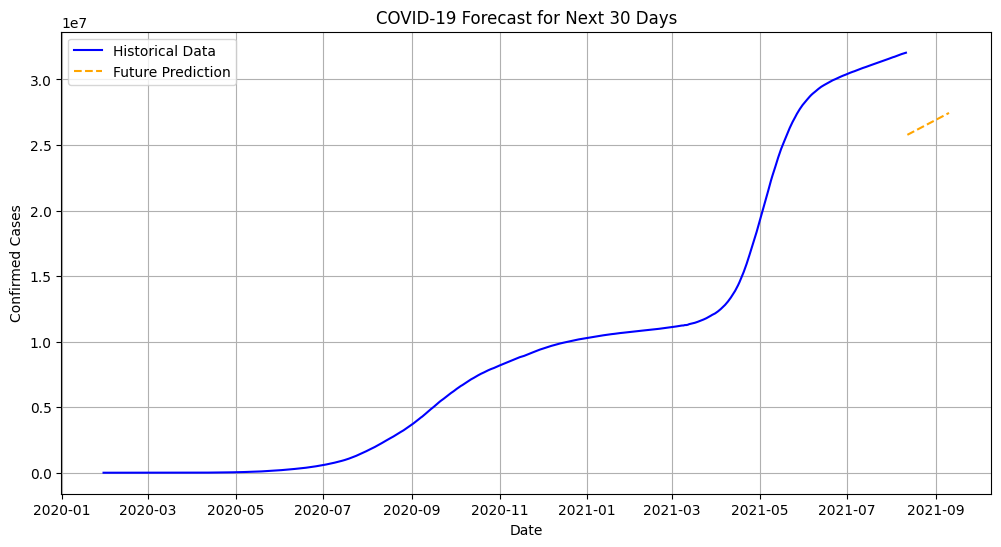

In [ ]:
# 1. Generate dates for the next 30 days
last_date = india_trend['Date'].max()
future_dates = [last_date + dt.timedelta(days=x) for x in range(1, 31)]

# 2. Convert these dates to numbers (ordinal) for the model
future_dates_ordinal = np.array([d.toordinal() for d in future_dates]).reshape(-1, 1)

# 3. Predict using your trained model
future_predictions = model.predict(future_dates_ordinal)

# 4. Create a DataFrame to show results
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Cases': future_predictions})
print("Future Predictions for next 5 days:")
print(future_df.head())

# 5. Plotting Past Data + Future Prediction
plt.figure(figsize=(12, 6))
sns.lineplot(data=india_trend, x='Date', y='Confirmed', label='Historical Data', color='blue')
sns.lineplot(data=future_df, x='Date', y='Predicted_Cases', label='Future Prediction', color='orange', linestyle='--')
plt.title('COVID-19 Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()

Descriptive Statistics:
           Confirmed         Cured         Deaths
count  5.600000e+02  5.600000e+02     560.000000
mean   9.735141e+06  9.010938e+06  131051.794643
std    1.018800e+07  9.700904e+06  127643.495163
min    1.000000e+00  0.000000e+00       0.000000
25%    3.637258e+05  1.924775e+05   12153.500000
50%    8.338981e+06  7.684144e+06  123963.000000
75%    1.174743e+07  1.121178e+07  160503.750000
max    3.203651e+07  3.122098e+07  429179.000000

Skewness:
 Confirmed    0.996870
Cured        1.064394
Deaths       0.974212
dtype: float64

Kurtosis:
 Confirmed   -0.178575
Cured        0.041137
Deaths       0.038944
dtype: float64


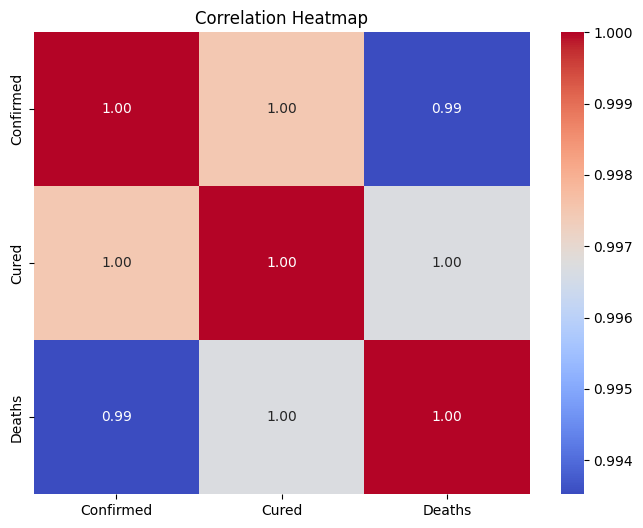

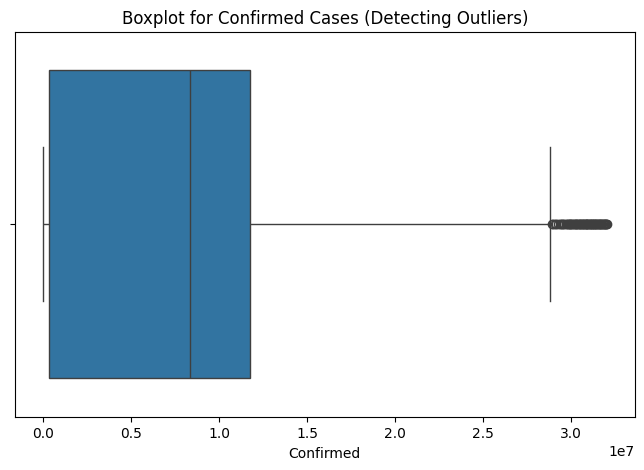

In [ ]:
# --- TASK 2 & 4: Spread of Data & Advanced EDA ---

# 1. Descriptive Statistics (Mean, Median, Std Dev)
desc_stats = india_trend[['Confirmed', 'Cured', 'Deaths']].describe()
print("Descriptive Statistics:\n", desc_stats)

# 2. Skewness and Kurtosis (Task 4 requirement)
print("\nSkewness:\n", india_trend[['Confirmed', 'Cured', 'Deaths']].skew())
print("\nKurtosis:\n", india_trend[['Confirmed', 'Cured', 'Deaths']].kurtosis())

# 3. Correlation Matrix & Heatmap (Task 2 requirement)
plt.figure(figsize=(8, 6))
correlation_matrix = india_trend[['Confirmed', 'Cured', 'Deaths']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 4. Boxplot to detect Outliers (Task 3 requirement)
plt.figure(figsize=(8, 5))
sns.boxplot(x=india_trend['Confirmed'])
plt.title('Boxplot for Confirmed Cases (Detecting Outliers)')
plt.show()

In [ ]:
# --- TASK 11 & 12: Model Evaluation Metrics ---
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors based on your previous Linear Regression model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Model Performance Metrics:")
print(f"R-Squared Score: {score:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Model Performance Metrics:
R-Squared Score: 0.87
Mean Squared Error (MSE): 14793074073883.49
Mean Absolute Error (MAE): 3230706.40


Classification Accuracy: 1.00

Confusion Matrix:
 [[65  0]
 [ 0 47]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        47

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



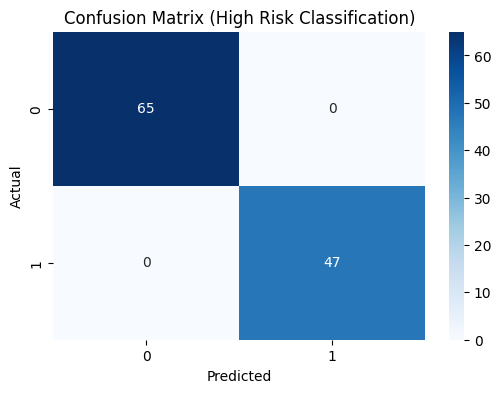

In [ ]:
# --- TASK 10: Classification Task (Logistic Regression) ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Create a Category: 'High_Risk' (1 if Deaths > Mean Deaths, else 0)
mean_deaths = india_trend['Deaths'].mean()
india_trend['High_Risk'] = india_trend['Deaths'].apply(lambda x: 1 if x > mean_deaths else 0)

# 2. Prepare Data for Classification
X_class = india_trend[['Confirmed', 'Cured']]  # Features
y_class = india_trend['High_Risk']             # Target (0 or 1)

# Split Data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# 3. Build Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train_c, y_train_c)

# 4. Predict
y_pred_class = log_model.predict(X_test_c)

# 5. Evaluate (Accuracy & Confusion Matrix)
acc = accuracy_score(y_test_c, y_pred_class)
cm = confusion_matrix(y_test_c, y_pred_class)

print(f"Classification Accuracy: {acc:.2f}")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_class))

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (High Risk Classification)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()